# Import Librairies

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
from sklearn import metrics

# Classification

Chargement des données

In [2]:
iris = load_iris()
X = iris.data

y = iris.target

Preprocessing

In [3]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

Modele

In [5]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

## Evaluation du Modele

### Accuracy
Précision = (TP+TN)/(TP+TN+FP+FN)

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Précision & Recall

In [7]:
print("Precision:", precision_score(y_test, y_pred, average="weighted"))

print('Recall:', recall_score(y_test, y_pred, average="weighted"))

Precision: 0.9435897435897436
Recall: 0.9333333333333333


### F1-score

In [8]:
# calculating f1 score
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))

F1 score: 0.9327777777777778


### Matrice de Confusion

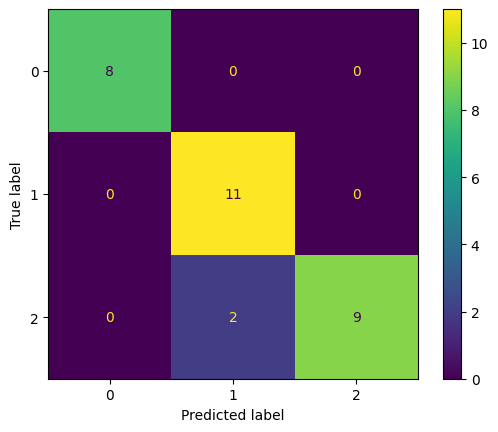

In [9]:
confusion_matrix = metrics.confusion_matrix(y_test,
                                            y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1, 2])

cm_display.plot()
plt.show()

### AUC

In [10]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = [1, 0, 0, 1]
y_pred = [1, 0, 0.9, 0.2]
auc = np.round(roc_auc_score(y_true,
                             y_pred), 3)
print("Auc", (auc))

Auc 0.75


# Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error
import os
import pandas as pd

In [34]:
def import_csv_data_from_google(data_url:str):
    return 'https://drive.google.com/uc?id=' + data_url.split('/')[-2]

In [35]:
data_link = 'https://drive.google.com/file/d/1EdLeIHgZtulZl-45WSvNz-dClE5_mTRo/view?usp=sharing'
#data_path = os.path.join(data_folder,'cardata.csv')

In [36]:
df = pd.read_csv(import_csv_data_from_google(data_link))
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [37]:
import numpy as np
np.unique(df['Car_Name'])

array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
       'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
       'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
       'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
       'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
       'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
       'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
       'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
       'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
       'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
       'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',
       'Mahindr

In [38]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'category':
        df[col] = le.fit_transform(df[col])


In [39]:
y = df['Selling_Price']
X = df.drop('Selling_Price',axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [42]:
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(X_test)

### Erreur Moyenne

In [44]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Error", mae)

Mean Absolute Error 0.9992677375915443


### R2-score

In [45]:
from sklearn.metrics import r2_score

In [46]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

r2_score(y_true, y_pred)

0.9486081370449679

In [47]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]

r2_score(y_true, y_pred,multioutput='variance_weighted')


0.9382566585956417

In [48]:
y_true = [1, 2, 3]
y_pred = [1, 2, 3]
r2_score(y_true, y_pred)

1.0